# Gender Predictions Exploratory Data Analysis

## Imports

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [4]:
# fface_df = pd.read_csv("../data/fface_train.csv")
raw_gender_preds_df = pd.read_csv("../data/ensemble_preds.csv")

## Preprocess

In [5]:
def prepare_age(df):
    """Prepares the age column from obj to integer
    by applying the average between the age range"""
    age_dict = dict()
    new_df = df.copy()

    for idx, values in new_df.iterrows():
        if values.age == 'more than 70':
            age_dict[idx] = 75
            continue
        age_arr = values.age.split('-')
        num_age_arr = [int(num) for num in age_arr]
        age_dict[idx] = np.mean(num_age_arr)
    
    for key, value in age_dict.items():
        new_df.at[key, 'age'] = value
    
    return new_df

In [6]:
with open('../data/raw_gender_labels.json', encoding='utf-8') as json_data:
    data = json.load(json_data)
    fface_classes = list(data.keys())
    fface_prompts = list(data.values())

In [7]:
print(fface_classes)
print(fface_prompts)

['Male', 'Female']
['a photo of a man', 'a photo of a woman']


In [8]:
# fface_df = prepare_age(fface_df)
# gender_preds_df = prepare_age(gender_preds_df)

## Initial EDA

In [9]:
print(raw_gender_preds_df.shape)
raw_gender_preds_df.head()

(10954, 6)


,file,age,gender,race,service_test,gender_preds
0,val/1.jpg,3-9,Male,East Asian,False,Male
1,val/2.jpg,50-59,Female,East Asian,True,Female
2,val/3.jpg,30-39,Male,White,True,Male
3,val/4.jpg,20-29,Female,Latino_Hispanic,True,Female
4,val/5.jpg,20-29,Male,Southeast Asian,False,Male


In [10]:
print('Hole dataset race proportions')
raw_gender_preds_df.race.value_counts(
    normalize=True).mul(100).round(1).astype(str) + '%'

Hole dataset race proportions


race
White              19.0%
Latino_Hispanic    14.8%
Black              14.2%
East Asian         14.2%
Indian             13.8%
Southeast Asian    12.9%
Middle Eastern     11.0%
Name: proportion, dtype: object

In [11]:
raw_gender_preds_df.race.value_counts()

race
White              2085
Latino_Hispanic    1623
Black              1556
East Asian         1550
Indian             1516
Southeast Asian    1415
Middle Eastern     1209
Name: count, dtype: int64

In [12]:
print('Hole dataset gender proportions')
raw_gender_preds_df.gender.value_counts(
    normalize=True).mul(100).round(1).astype(str) + '%'

Hole dataset gender proportions


gender
Male      52.9%
Female    47.1%
Name: proportion, dtype: object

In [13]:
raw_gender_preds_df.gender.value_counts()

gender
Male      5792
Female    5162
Name: count, dtype: int64

### Binary Gender Predictions

In [14]:
print('Gender predictions proportions')
raw_gender_preds_df.gender_preds.value_counts(
    normalize=True).mul(100).round(1).astype(str) + '%'

Gender predictions proportions


gender_preds
Male      54.8%
Female    45.2%
Name: proportion, dtype: object

In [15]:
raw_gender_preds_df.gender_preds.value_counts()

gender_preds
Male      6001
Female    4953
Name: count, dtype: int64

In [16]:
gender_preds_misses = raw_gender_preds_df[raw_gender_preds_df['gender']
                                          != raw_gender_preds_df['gender_preds']]

In [17]:
gender_preds_acc = accuracy_score(
    raw_gender_preds_df['gender'], raw_gender_preds_df['gender_preds'])
print(f"gender_preds misses count: {len(gender_preds_misses)}")
print(f"gender_preds accuracy score: {round(gender_preds_acc, 2)}")

gender_preds misses count: 579
gender_preds accuracy score: 0.95


In [18]:
male_preds_acc = accuracy_score(
    raw_gender_preds_df[raw_gender_preds_df['gender'] == 'Male']['gender'], raw_gender_preds_df[raw_gender_preds_df['gender'] == 'Male']['gender_preds']
)
print(f"male predictions accuracy score: {round(male_preds_acc, 2)}")

male predictions accuracy score: 0.97


In [19]:
female_preds_acc = accuracy_score(
    raw_gender_preds_df[raw_gender_preds_df['gender'] ==
                        'Female']['gender'], raw_gender_preds_df[raw_gender_preds_df['gender'] == 'Female']['gender_preds']
)
print(f"female predictions accuracy score: {round(female_preds_acc, 2)}")

female predictions accuracy score: 0.92


In [20]:
for race in raw_gender_preds_df['race'].unique():
    race_df = raw_gender_preds_df[raw_gender_preds_df['race'] == race]
    race_preds_acc = accuracy_score(race_df['gender'], race_df['gender_preds'])
    print(f"{race} predictions accuracy: {round(race_preds_acc, 2)}")

East Asian predictions accuracy: 0.95
White predictions accuracy: 0.95
Latino_Hispanic predictions accuracy: 0.95
Southeast Asian predictions accuracy: 0.95
Black predictions accuracy: 0.91
Indian predictions accuracy: 0.95
Middle Eastern predictions accuracy: 0.97


In [21]:
for age in raw_gender_preds_df['age'].unique():
    age_df = raw_gender_preds_df[raw_gender_preds_df['age'] == age]
    age_preds_acc = accuracy_score(age_df['gender'], age_df['gender_preds'])
    print(f"Ages {age} predictions accuracy: {round(age_preds_acc, 2)}")

Ages 3-9 predictions accuracy: 0.86
Ages 50-59 predictions accuracy: 0.97
Ages 30-39 predictions accuracy: 0.98
Ages 20-29 predictions accuracy: 0.97
Ages more than 70 predictions accuracy: 0.97
Ages 40-49 predictions accuracy: 0.98
Ages 10-19 predictions accuracy: 0.89
Ages 60-69 predictions accuracy: 0.97
Ages 0-2 predictions accuracy: 0.81


## Plots

In [22]:
y_test = gender_preds_df['gender'].to_numpy()
binary_gender_predictions = gender_preds_df['gender_preds'].to_numpy()
gender_labels = ['Male', 'Female']
cm = confusion_matrix(y_test, binary_gender_predictions, labels=gender_labels)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=gender_labels)
print("Gender predictions confusion matrix")
disp.plot()

NameError: name 'gender_preds_df' is not defined

Synonyms Gender predictions confusion matrix


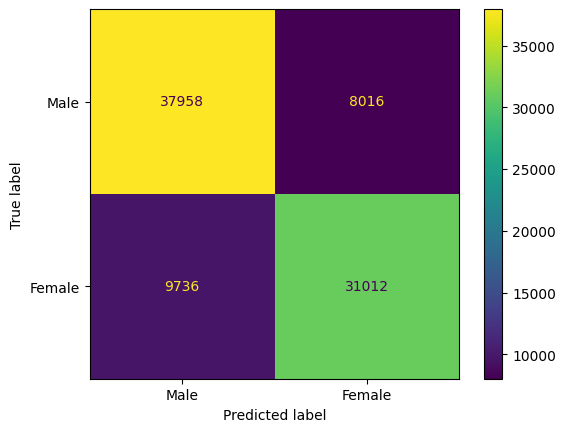

In [ ]:
y_test = gender_preds_df['gender'].to_numpy()
synonyms_gender_predictions = binary_synms_preds_series.to_numpy()
gender_labels = ['Male', 'Female']
cm = confusion_matrix(y_test, synonyms_gender_predictions, labels=gender_labels)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=gender_labels)
print("Synonyms Gender predictions confusion matrix")
disp.plot()

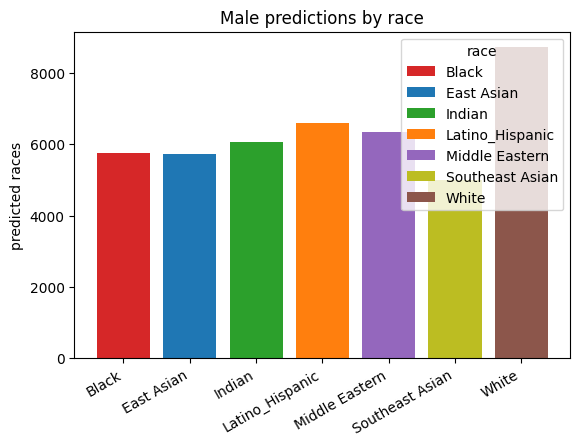

In [ ]:
fig, ax = plt.subplots()

races = gender_preds_df['race'].unique()
races.sort()
counts = gender_preds_df[gender_preds_df['gender_preds'] == 'Male']['race'].value_counts().sort_index()
race_labels = races.copy()
bar_colors = ['tab:red', 'tab:blue', 'tab:green',
              'tab:orange', 'tab:purple', 'tab:olive', 'tab:brown']

ax.bar(races, counts, label=race_labels, color=bar_colors)

ax.set_ylabel('predicted races')
ax.set_title('Male predictions by race')
ax.legend(title='race')
ax.figure.autofmt_xdate()

plt.show()

In [ ]:
races

array(['Black', 'East Asian', 'Indian', 'Latino_Hispanic',
       'Middle Eastern', 'Southeast Asian', 'White'], dtype=object)

In [ ]:
counts.sort_index()

race
Black              5765
East Asian         5722
Indian             6051
Latino_Hispanic    6586
Middle Eastern     6348
Southeast Asian    4995
White              8725
Name: count, dtype: int64